In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hepattn.experiments.clic.performance.performance import Performance, PerformanceConfig

In [3]:
from hepattn.experiments.clic.performance.plot_helper_event import PlotEventHelper

In [4]:
config_dict = {
    "truth_path": "/storage/agrp/dmitrykl/hgpf/hepformer/data/nilo/test_clic_common_raw.root",
    "networks": [
        {
            "name": "mpflow",
            "path": "/storage/agrp/dmitrykl/hgpf/hepattn/src/hepattn/experiments/clic/logs/CLIC_Pflow_FullDiceFocFix_20250613-T142512/ckpts/epoch=159-val_loss=3.51694__test__common.root",
            "network_type": "mpflow_proxy",
            "ind_threshold": 0.65,
        },
        # {
        #     "name": "hgpflow",
        #     "path": "/storage/agrp/nilotpal/HGPFlow_v2/experiments/hgpflow_v2/clicxminixbig1x2xs2xxxds7kirm1yo/inference/ee_qq_new/pred_test_p8_ee_qq_ecm380_20k_seg_bw0.3_nocut_merged.root",
        #     "network_type": "hgpflow_proxy",
        #     "ind_threshold": 0.65,
        # },
    ],
}

In [5]:
config = PerformanceConfig.from_dict(config_dict)

In [6]:
performance = Performance(config)

E, pT will be scaled by 1


Reading truth tree...: 100%|██████████| 11/11 [00:01<00:00,  6.29it/s]


Number of events with at least one track or topocluster: 19998 out of 20000
[[ 1399]
 [11288]]
Number of events after filtering: 19998


Computing mpflow mass...: 100%|██████████| 19722/19722 [00:00<00:00, 48339.48it/s]


In [7]:
performance.config.networks

[NetworkConfig(name='mpflow', path=PosixPath('/storage/agrp/dmitrykl/hgpf/hepattn/src/hepattn/experiments/clic/logs/CLIC_Pflow_FullDiceFocFix_20250613-T142512/ckpts/epoch=159-val_loss=3.51694__test__common.root'), network_type=<NetworkType.MPFLOW_PROXY: 'mpflow_proxy'>, num_events=None, ind_threshold=0.65),
 NetworkConfig(name='pandora', path=PosixPath('/storage/agrp/dmitrykl/hgpf/hepformer/data/nilo/test_clic_common_raw.root'), network_type=<NetworkType.PANDORA: 'pandora'>, num_events=None, ind_threshold=0.5)]

In [8]:
performance.reorder_and_find_intersection()

common event count: 19722


Filtering and reordering pandora...: 100%|██████████| 7/7 [00:00<00:00, 1564.79it/s]


In [9]:
import numpy as np

In [10]:
idx = 0

print("Particle data")
print(np.sort(performance.truth_dict["particle_pt"][idx][performance.truth_dict["particle_class"][idx] <= 2])[::-1])
print("MPflow proxy data")
print(np.sort(performance.data["mpflow"]["pt"][idx][performance.data["mpflow"]["class"][idx] <= 2])[::-1])

Particle data
[2.05544543 2.00689816 1.22862697 1.21958816 0.94735843 0.93824512
 0.68863207 0.58046174 0.57142735 0.56641656 0.51084858 0.45804888
 0.45783955 0.3199735  0.26255557 0.26148829 0.2348657  0.2299964
 0.22890501 0.17870697]
MPflow proxy data
[2.055761   2.0023139  1.2279531  1.2232833  0.94966733 0.946075
 0.6072137  0.5837236  0.5793992  0.5742155  0.5266971  0.45971563
 0.45850793 0.3203549  0.26150483 0.23455955 0.22790605 0.18378448
 0.14520137]


In [11]:
performance.compute_jets(n_procs=20)

Jet clustering algorithm:  genkt
Jet clustering radius:  0.7
truth


Computing jets...:   0%|          | 0/20 [00:00<?, ?Chunk/s]

                  

Computing jets...:   5%|▌         | 1/20 [00:03<01:01,  3.24s/Chunk]

  

Computing jets...: 100%|██████████| 20/20 [00:06<00:00,  3.29Chunk/s]


Computing jets for mpflow...


Computing jets...: 100%|██████████| 20/20 [00:06<00:00,  3.02Chunk/s]


Computing jets for pandora...


Computing jets...: 100%|██████████| 20/20 [00:05<00:00,  3.54Chunk/s]


In [12]:
performance.hung_match_jets()
performance.compute_event_features()
performance.compute_jet_res_features(dr_cut=0.1, leading_n_jets=2, pt_min=10)

Matching jets...: 100%|██████████| 19722/19722 [00:00<00:00, 55805.36it/s]


In [13]:
from collections import defaultdict


def default_style_dict():
    return {
        "histtype": "step",
        "linewidth": 1,
    }


style_dict = defaultdict(default_style_dict)
style_dict["pandora"] = {
    "color": "gray",
    "alpha": 0.5,
    "histtype": "stepfilled",
}

In [14]:
plot_event_helper = PlotEventHelper(performance, style_dict=style_dict)

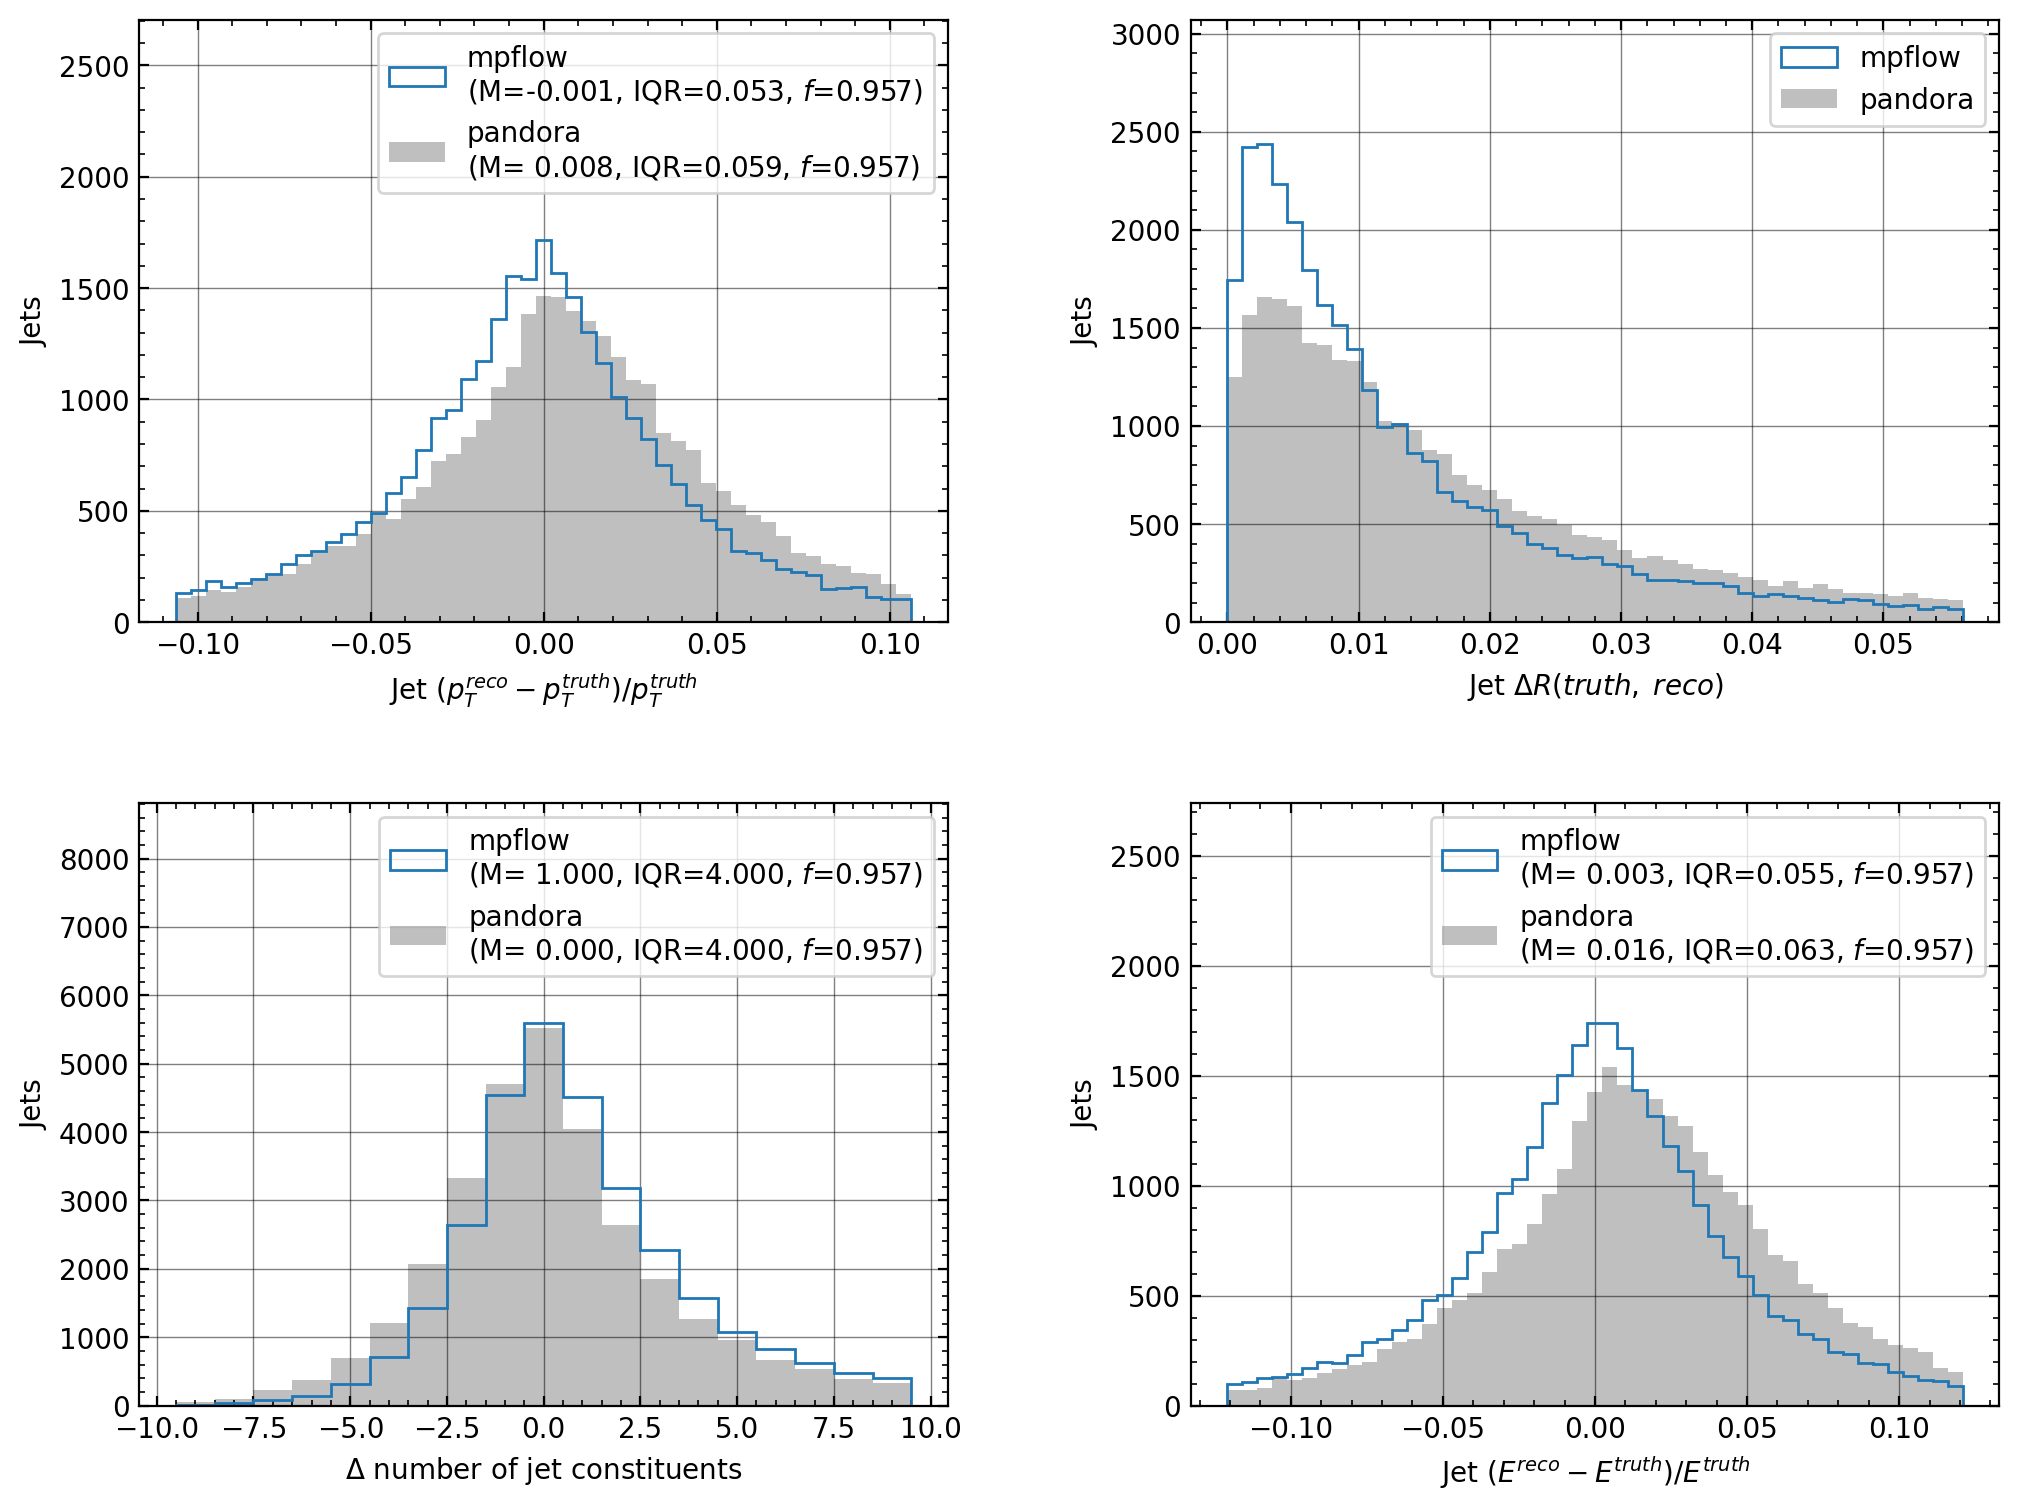

In [15]:
fig = plot_event_helper.plot_jet_residuals()

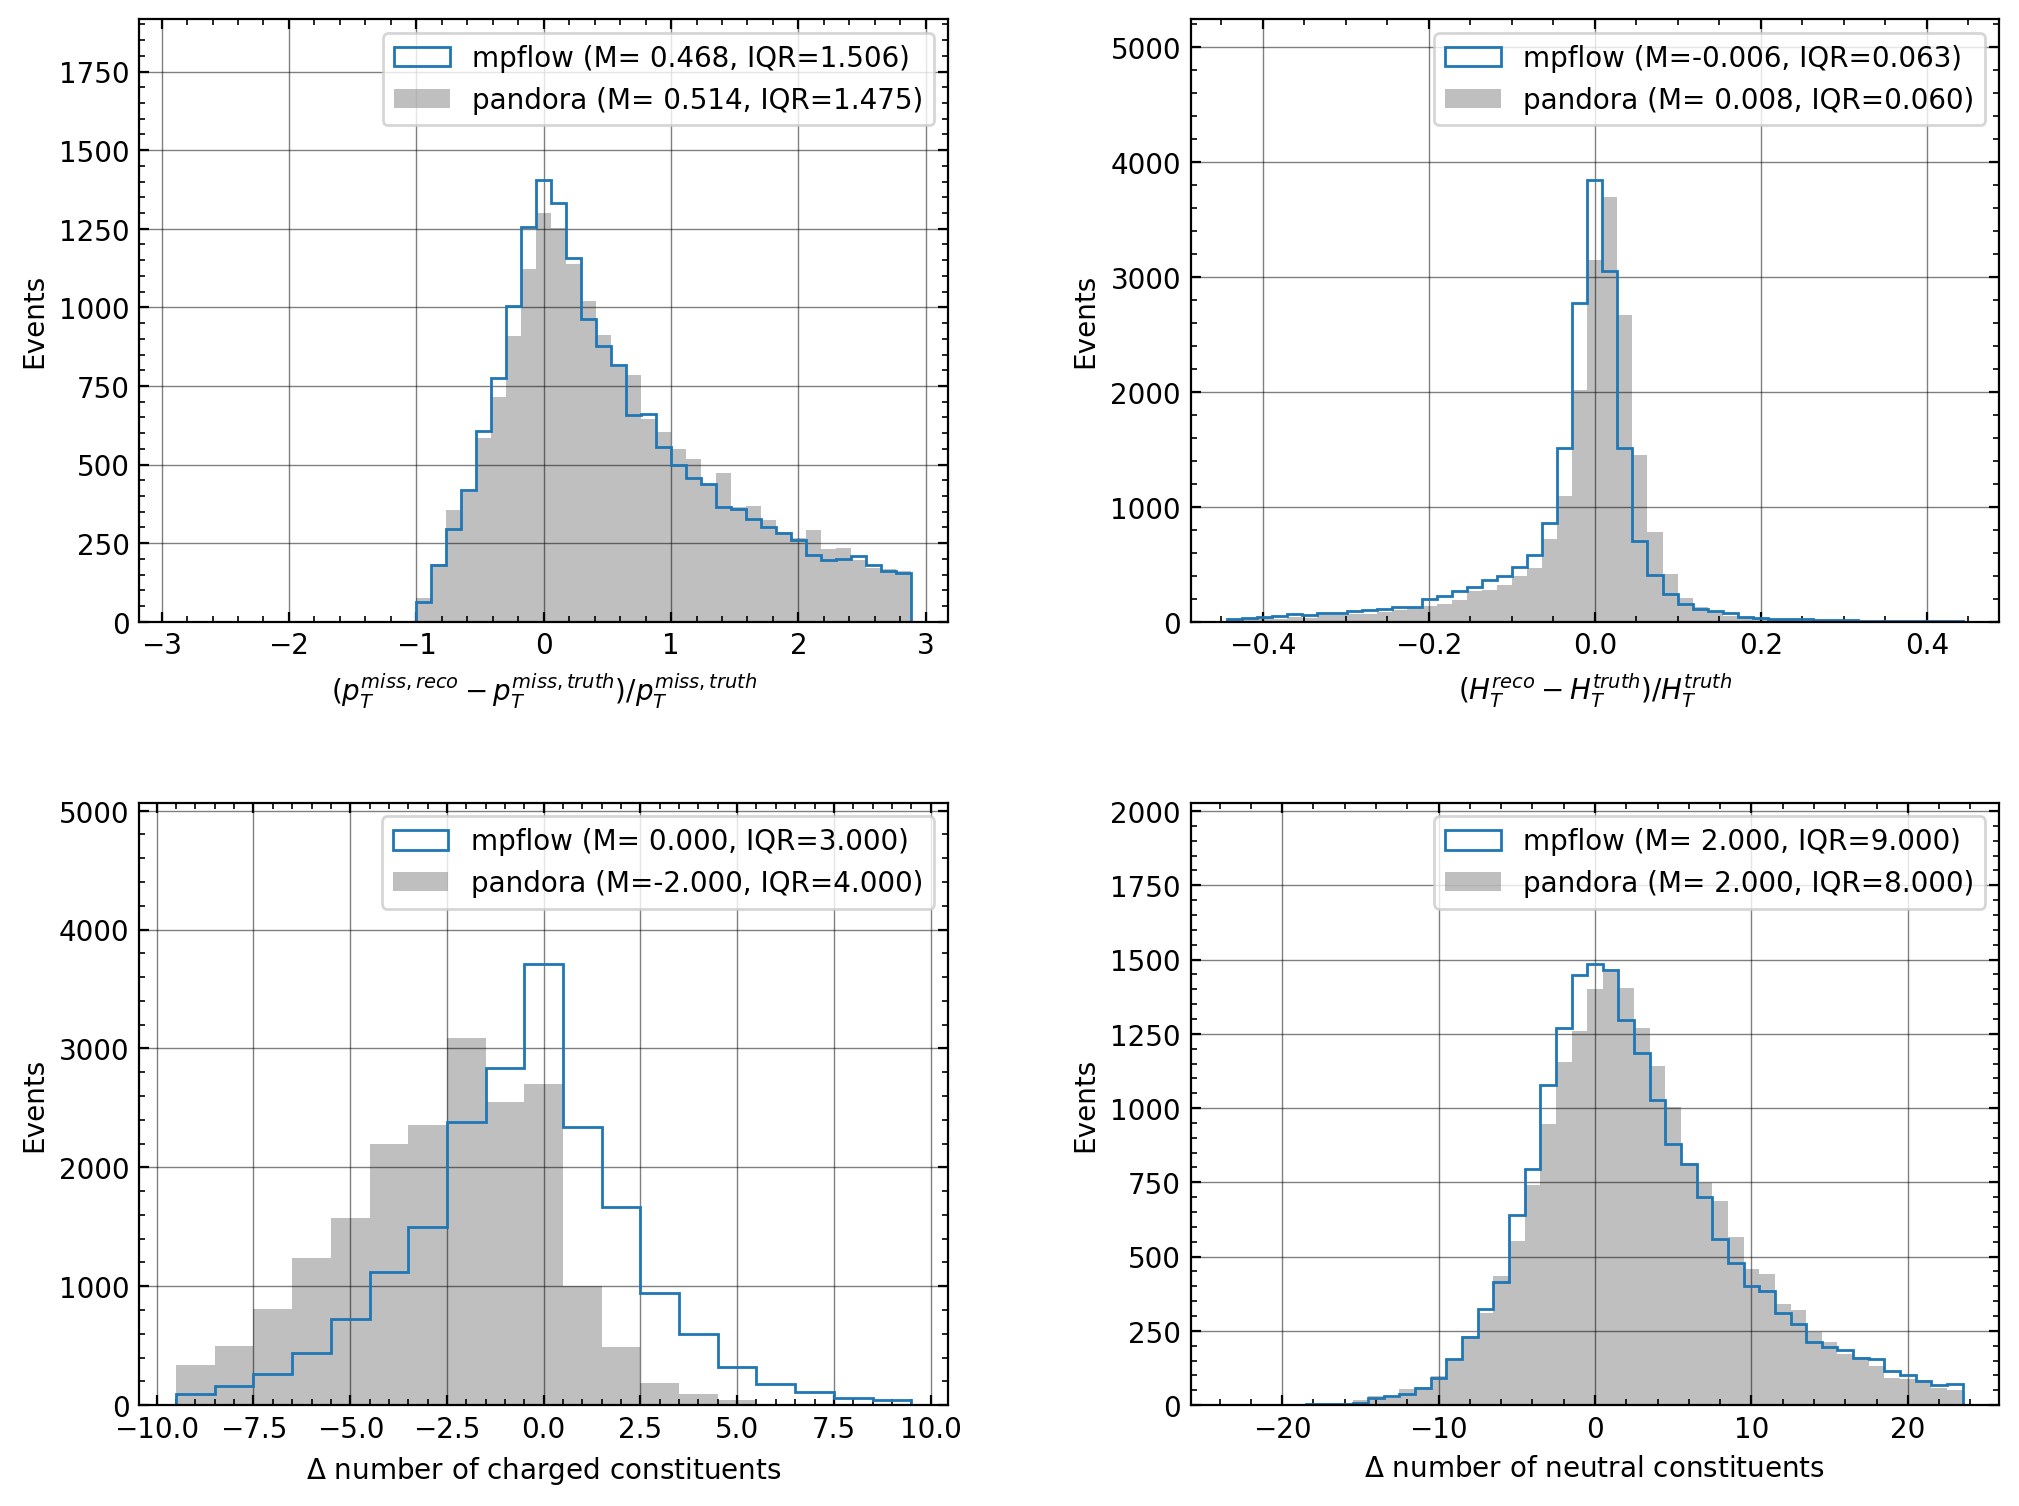

In [24]:
fig = plot_event_helper.plot_evt_res()

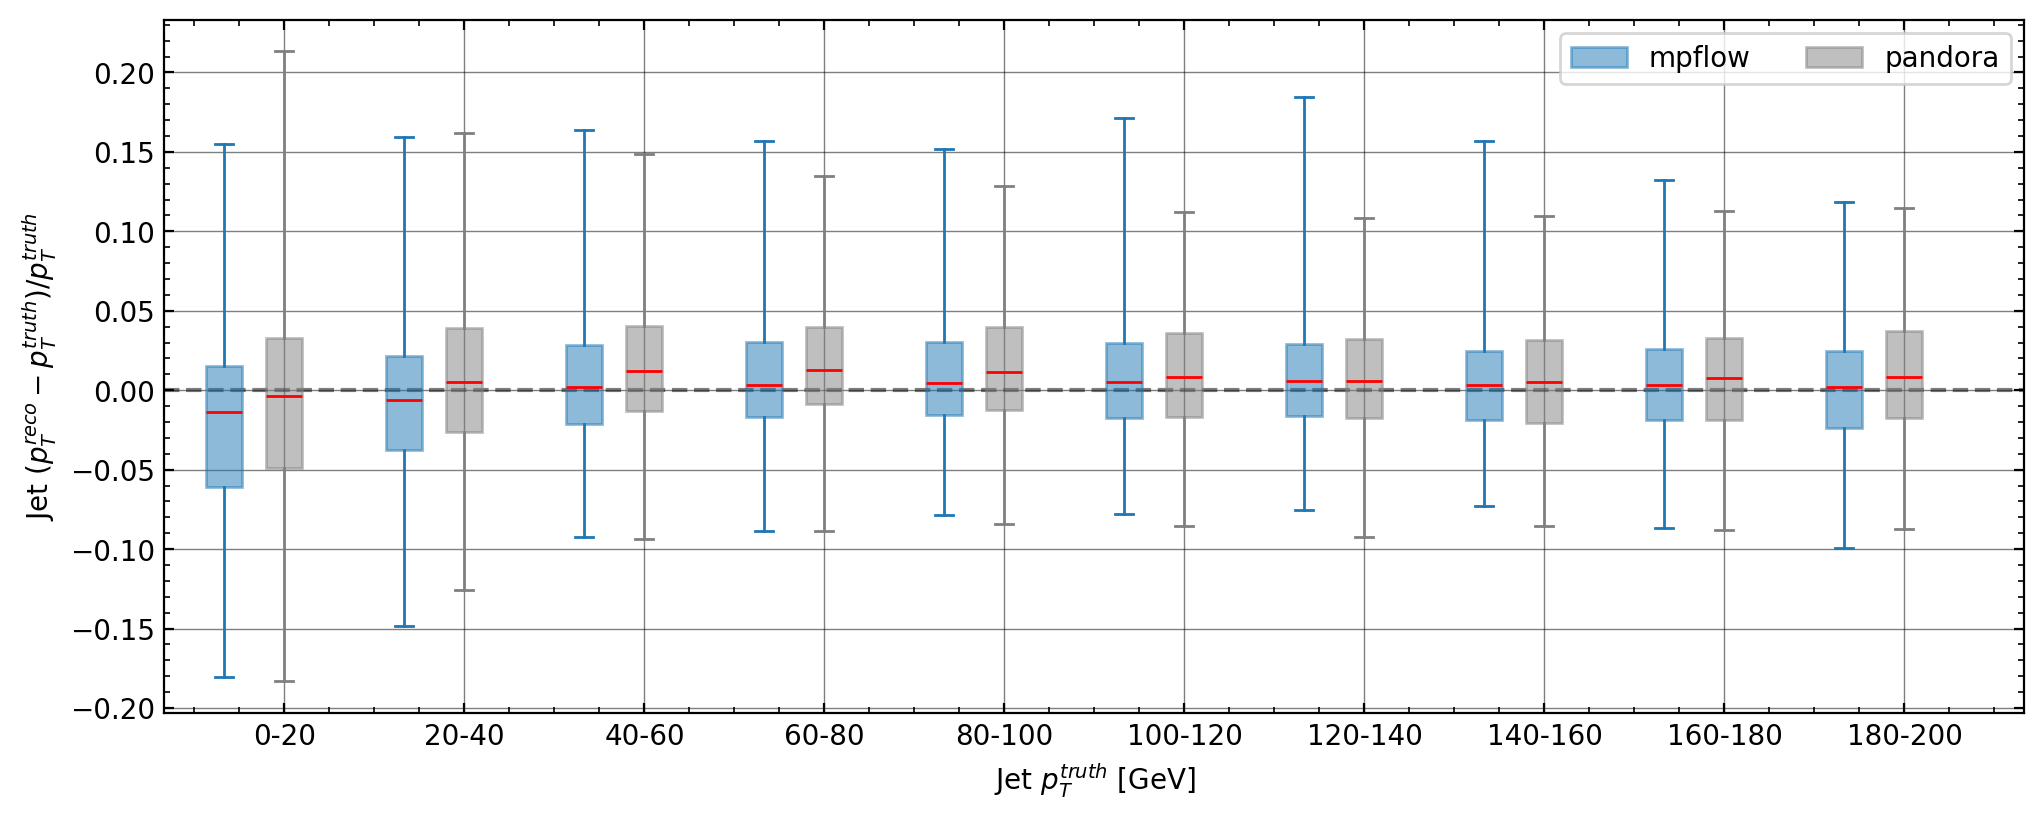

In [25]:
pt_bins = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
fig = plot_event_helper.plot_jet_res_boxplot(bins=pt_bins)

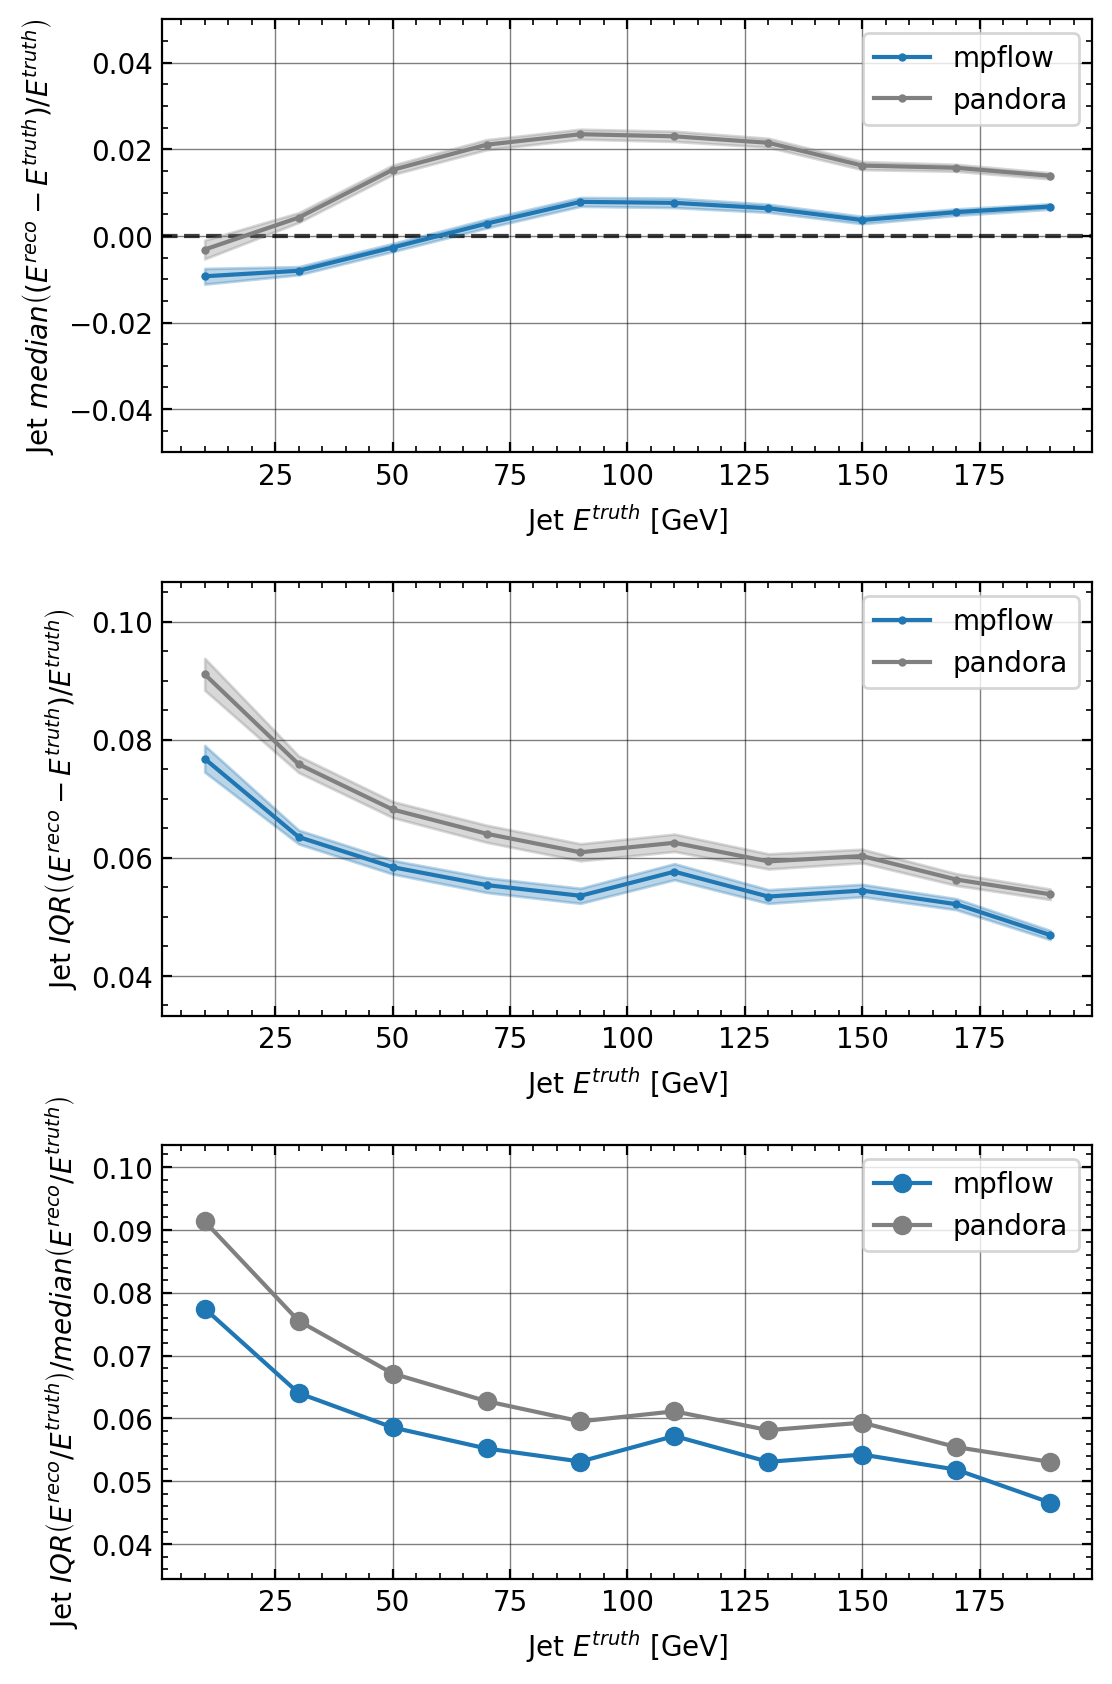

In [27]:
fig = plot_event_helper.plot_jet_response(pt_bins=pt_bins, use_energy=True)